# TP5 : A la découverte des images RGB (Red Green Blue)

## 1. Rehaussement par Laplacien

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

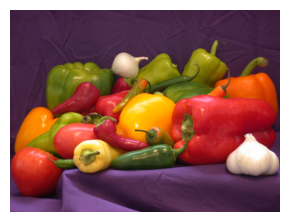

In [2]:
def normalize(image):
    r_img=np.copy(image)
    return (r_img-r_img.min())/(r_img.max()-r_img.min())

def show_images(images,mode="float",gray=False):
    n=len(images)
    fig=plt.figure( figsize=(3*n, 5*n))
    axs=[]
    
    for i in range(n):
        axs.append( fig.add_subplot(1,n,i+1) )
        plt.axis('off')
        im = np.clip(images[i], 0, 1 if mode=="float" else 255)
        if gray:
            plt.imshow(im,cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(im)
    fig.tight_layout()  
    plt.show()   
    
img=normalize(plt.imread('peppers.png'))
show_images([img])


In [3]:
Laplacien=np.array([[0,1,0],[1,-4,1],[0,1,0]])
print(Laplacien)


[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


### Images originales

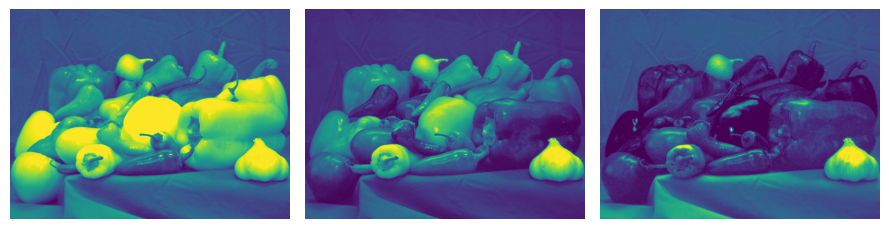

In [4]:
imgs=[ img[:,:,i] for i in range(3)]
show_images(imgs)

### Images filtrées

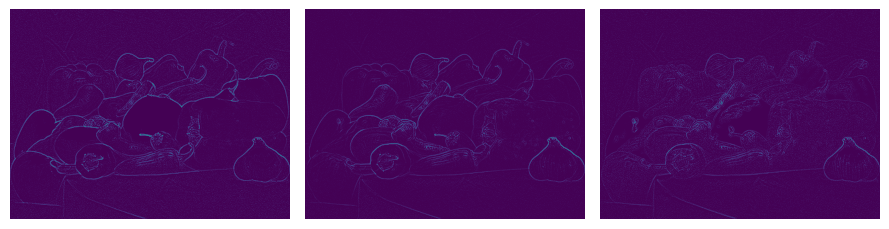

In [5]:
grad1= signal.convolve2d(img[:,:,0], Laplacien, boundary='symm', mode='same')
grad2= signal.convolve2d(img[:,:,1], Laplacien, boundary='symm', mode='same')
grad3= signal.convolve2d(img[:,:,2], Laplacien, boundary='symm', mode='same')
filtred=[grad1,grad2,grad3]
show_images(filtred)

### Images réhaussées

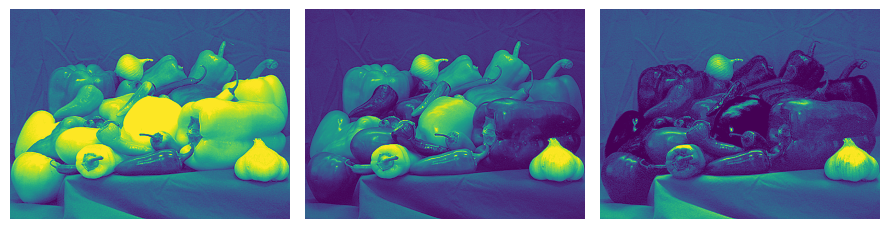

In [6]:
imgs2=[a-b for a,b in zip(imgs,filtred)]
show_images(imgs2)

[[[0.23529412 0.09803922 0.25882356]
  [0.25882353 0.11764705 0.25098041]
  [0.25490195 0.16862747 0.2666667 ]
  ...
  [0.27450986 0.12941176 0.24313726]
  [0.2588235  0.10980392 0.21176471]
  [0.28627455 0.11372549 0.21176471]]

 [[0.25098038 0.1372549  0.23529409]
  [0.22352941 0.12156862 0.26666671]
  [0.17254901 0.13333336 0.27058828]
  ...
  [0.22352938 0.10196079 0.19607843]
  [0.1882353  0.10196079 0.18431373]
  [0.17647058 0.10196079 0.22745098]]

 [[0.27843143 0.10196079 0.21176471]
  [0.23137252 0.11764706 0.2352941 ]
  [0.23529409 0.12549019 0.25490195]
  ...
  [0.29019615 0.08627451 0.20784314]
  [0.28235292 0.10588235 0.23921569]
  [0.21176471 0.10588235 0.22352941]]

 ...

 [[0.4627451  0.27450982 0.52549022]
  [0.44705883 0.21568629 0.49411768]
  [0.49803922 0.29411766 0.58039218]
  ...
  [0.20392157 0.07843138 0.18039216]
  [0.20784314 0.12156863 0.19607843]
  [0.12156864 0.10588235 0.12156864]]

 [[0.43529412 0.25882354 0.4784314 ]
  [0.37254903 0.24705884 0.49803925]


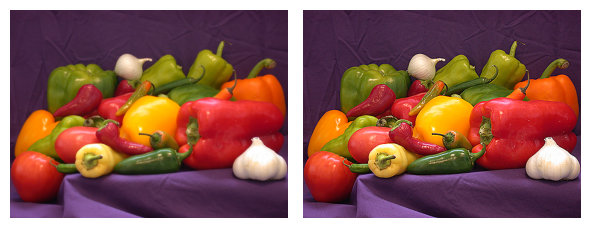

In [7]:
img2= np.dstack(imgs2)
print(img2)
print(img2.shape)
show_images([img,img2])

img = plt.imread('peppers.png')## 2. Manipulation des composantes RGB

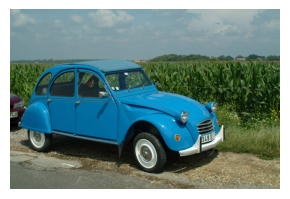

In [8]:
img3 = plt.imread('2cv.jpg')
show_images([img3],"int")

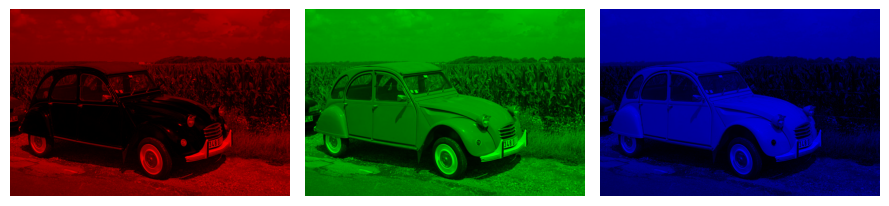

In [9]:
def compo_image(img,color):
    empty=np.zeros(img.shape,dtype=int)
    empty[:,:,color]=img[:,:,color]
    return empty
red=compo_image(img3,0)
green=compo_image(img3,1)
blue=compo_image(img3,2)
rgb=[red,green,blue]
show_images(rgb,"int")

On voit que pour le rouge les pixels correspondant a la carosserie sont noirs

## 2. Filtrage en fonction des composantes

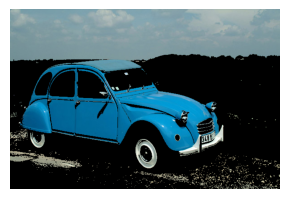

In [10]:
def filter_image(img,seuil,color,sup=True):
    imgf=np.zeros(np.shape(img),dtype=int)
    masque= (img[:,:,color]>seuil) if sup else (img[:,:,color]<seuil)
    imgf[masque,0]=img[masque,0]
    imgf[masque,1]=img[masque,1]
    imgf[masque,2]=img[masque,2]
    return imgf

test=[ filter_image(img3,x,2) for x in [125] ]

show_images(test,"int")


La majeure partie du bleu de l'image vient de la carosserie et du ciel (et du blanc). Il est donc logique que le filtre retienne ces zones de l'image.

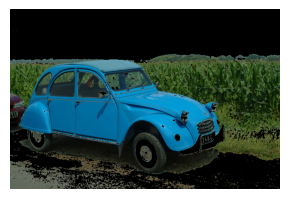

In [11]:
test1=[ filter_image(img3,x,0,False) for x in [112] ]
show_images(test1,"int")

In [12]:
def filter_image2(img):
    imgf=np.zeros(np.shape(img),dtype=int)
    masque1= (img[:,:,0]<112)
    masque2= (img[:,:,2]>125)
    masque = masque1&masque2
    imgf[masque,0]=img[masque,0]
    imgf[masque,1]=img[masque,1]
    imgf[masque,2]=img[masque,2]
    return imgf


(400, 600)


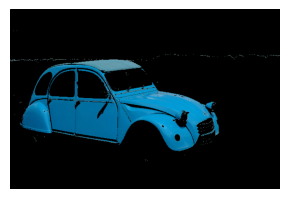

In [13]:
test3=filter_image2(img3)
print(test3[:,:,0].shape)
show_images([test3],"int")

In [14]:
def colorier(img,color):
    imgt=np.copy(img)
    n1,n2=imgt[:,:,0].shape
    
    masque1= (img[:,:,0]<112)
    masque2= (img[:,:,2]>125)
    masque = masque1&masque2
    if color:
        imgt[masque,0]=np.array( [ color[0] for _ in range(len(imgt[masque,0])) ])
        imgt[masque,1]=np.array( [ color[1] for _ in range(len(imgt[masque,0])) ])
        imgt[masque,2]=np.array( [ color[2] for _ in range(len(imgt[masque,0])) ])
    else:
        imgt[masque,0]=img[masque,0]
        imgt[masque,1]=img[masque,2]
        imgt[masque,2]=img[masque,1]
    return imgt


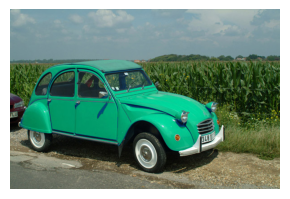

In [15]:
test5=[colorier(img3,[])]
show_images(test5,"int")

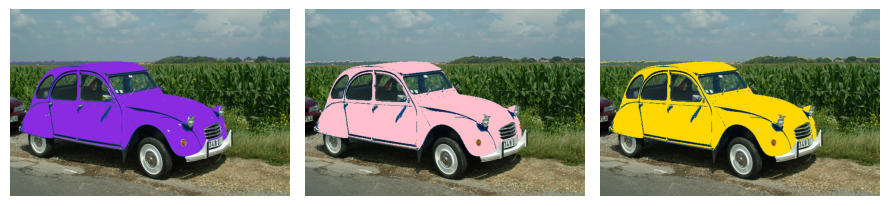

In [16]:
colors=[ (138,43,226) , (255,192,203) , (255,215,0)]
test4=[ colorier(img3,c) for c in colors]
show_images(test4,"int")

## 3. Conversion d'image

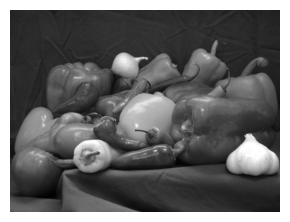

In [22]:
def rgb2gray(rgb):
    im=normalize(np.dot(rgb, [0.299, 0.587, 0.144]).astype(float))*255
    im=im.astype(int)
    im=np.clip(im, 0, 255)
    return im
img4=rgb2gray(img)
show_images([img4],255,True)


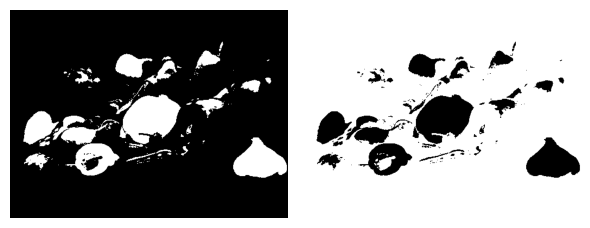

In [23]:
show_images([np.where(img4<128,0,1),np.where(img4>128,0,1)],1,True)

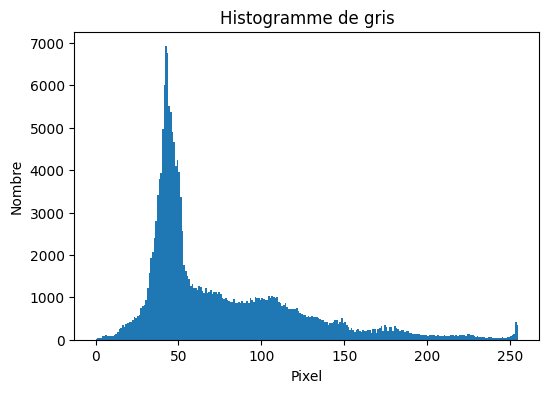

In [24]:
def histogramme(img):
    h = np.zeros(256,dtype=int)
    s = img.shape
    for j in range(s[0]):
        for i in range(s[1]):
            v = img[j,i]
            h[v] += 1
    fig=plt.figure(figsize=(6,4))
    plt.hist(np.ravel(img4), bins=255)
    plt.xlabel("Pixel")
    plt.ylabel("Nombre")
    plt.title("Histogramme de gris")
    return h
    
h = histogramme(img4)

print()

Text(0.5, 1.0, 'CDF')

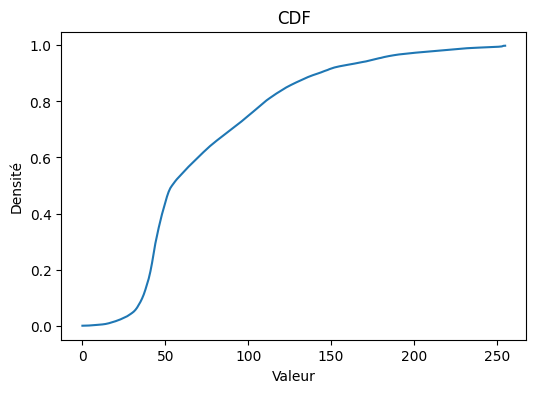

In [25]:
d= np.array([ np.sum(h[:i])/np.sum(h) for i in range(256)])
fig=plt.figure(figsize=(6,4))
plt.plot(d)
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.title("CDF")


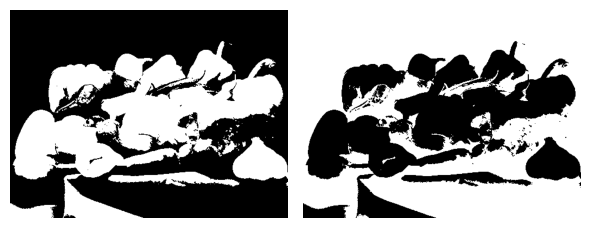

(array([  0,   0,   0, ..., 383, 383, 383], dtype=int64), array([  0,   1,   2, ..., 509, 510, 511], dtype=int64))


In [27]:
seuil=73
show_images([np.where(img4<seuil,0,1),np.where(img4>seuil,0,1)],"int",True)
print(np.where(img4<seuil))

Pour une densité de 0.5 , vers 100 l'image est plus lisible